<a href="https://colab.research.google.com/github/MarriaK/eDNA-Classification/blob/main/Machine_LearningClassifiers_SequenceEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# read csv file
data = pd.read_csv('/content/drive/MyDrive/Bioinformatics Group Project /Code/Data/data2.csv')

In [ ]:
data

,sequence,type
0,CCTTTAGCTGGAAACCTAGCCCATGCTGGAGCATCCGTCGACTTAA...,0
1,CCTTTAGCTGGTAACCTAGCCCATGCTGGAGCATCCGTTGACTTAA...,0
2,CCTTTAGCTGGAAACCTAGCCCATGCTGGAGCATCCGTTGACTTAA...,0
3,CCTTAGCTGGAAACCTAGCCCATGCTGGAGCATCCGTTGACTTAAC...,0
4,CCTTTAGCTGGAAACCTAGCCCACGCTGGAGCATCCGTTGACTTAA...,0
...,...,...
189,TTTAGCCGGAAACCTCGCTCATGCTGGGGCATCTGTTGATCTCACT...,4
190,CCTTTAGCCGGAAACCTCGCTCATGCTGGGGCATCTGTTGATCTCA...,4
191,TTTAGCCGGAAACCTCGCTCATGCTGGGGCATCTGTTGATCTCACT...,4
192,TTTAGCCGGAAACCTCGCTCATGCTGGGGCATCTGTTGATCTCACT...,4


In [ ]:
data.type.value_counts()

3    51
0    44
4    43
1    28
2    28
Name: type, dtype: int64

In [ ]:
data.head(3)

,sequence,type
0,CCTTTAGCTGGAAACCTAGCCCATGCTGGAGCATCCGTCGACTTAA...,0
1,CCTTTAGCTGGTAACCTAGCCCATGCTGGAGCATCCGTTGACTTAA...,0
2,CCTTTAGCTGGAAACCTAGCCCATGCTGGAGCATCCGTTGACTTAA...,0


#Convert sequence data into numerical data with Sequential Encoding method

In [ ]:
# prep data and lebels 
import numpy as np
def label_to_count(labels):
    '''
    Given a list of labels, returns a dictionary that maps each class label to how many
    instances of that label were present in the list.
    '''
    label_to_count_dict = {}
    for label in labels:
        if label not in label_to_count_dict:
            label_to_count_dict[label] = 0
        label_to_count_dict[label] += 1
    return label_to_count_dict

def prepare_data(seqs):
    '''
    Given a list of sequences, will turn into a tokenized vector.
    
    ARGS:
        seqs: a list of strings where every string is a sequence
    RETURNS:
        tokenized_seqs (list(list(int))): list of list of tokens
        voc2ind (dict) a dictionary where keys are letters, values are the corresponding token
    '''
    max_len = 0
    
    # build up a voc2ind (letters:token)
    # based on ATGC and include padding and unknown tokens
    voc2ind = {voc:ind for ind,voc in enumerate(['<pad>', '<unk>', 'A', 'T', 'C', 'G'])}
    
    i = len(voc2ind)
    
    # tokenize the sequences
    tokenized_seqs = []
    for seq in seqs:
        tokenized_seq = []
        for e in seq:
            # make sure the sequence is upper case, a == A
            seq = seq.upper()
            # if we haven't seen this letter before, add to the corupus
            if not e in voc2ind:
                voc2ind[e] = i
                i += 1
            tokenized_seq.append(voc2ind[e])
        tokenized_seqs.append(tokenized_seq)
        
    return tokenized_seqs, voc2ind
        
res = prepare_data(['ATCG', 'TAGA', 'APO'])
print(res)
assert(res[0] == [[2, 3, 4, 5], [3, 2, 5, 2], [2, 6, 7]]), res[0]


def prepare_labels(labels):
    '''
    Given a list of labels will turn them into integer labels
    Args:
        labels: a list of labels
    Returns:
        tokenized_labels: numpy array(list) a list of label tokens
        label2token: (dict) a dictionary where keys are letters, values are corresponding token
    '''
    tokenized_labels = []
    label2token = {}
    i = 0
    for label in labels:
        if not label in label2token:
            label2token[label] = i
            i += 1
        tokenized_labels.append(label2token[label])
    return tokenized_labels, label2token


def pad(tokenized_seqs, voc2ind):
    '''
    Pad each sequence to the maximum length by adding a <pad> token
    
    ARGS:
        tokenized_seqs (list(list(str))): list of list of tokens
        voc2ind (dict) a dictionary where keys are letters, values are the corresponding token
    RETURNS:
        a numpy array of all the tokenized sequences that have been padded to be the same
        length.
    '''

    padded_seqs = []
    
    # find max sequence length
    max_len = 0
    for seq in tokenized_seqs:
        max_len = max(len(seq), max_len)
    
    # add padding so sequences are max_length
    for seq in tokenized_seqs:
        padded_seq = seq + [voc2ind['<pad>']] * (max_len - len(seq))
        padded_seqs.append(padded_seq)
        
    return np.array(padded_seqs, dtype=np.float32)/6

([[2, 3, 4, 5], [3, 2, 5, 2], [2, 6, 7]], {'<pad>': 0, '<unk>': 1, 'A': 2, 'T': 3, 'C': 4, 'G': 5, 'P': 6, 'O': 7})


In [ ]:
sequence = data['sequence'].values.tolist()
labels = data['type'].values.tolist()

In [ ]:
def dataprep(seqs, labels_all):
  # tokenizing and getting a vocab
  token_seqs, voc2ind = prepare_data(seqs)

  # padding
  token_seqs = pad(token_seqs, voc2ind)

  # tokenizing labels
  tokenized_labels, label2token = prepare_labels(labels_all)

  # Showing the result of this:
  print("\n","tokenized sequences","\n", token_seqs, "\n\n", "letters to token "+str(voc2ind), "\n\n", "label_to_count " + str(label_to_count(labels_all)))

  return np.array(token_seqs), np.array(tokenized_labels)

In [ ]:
X, Y = dataprep(sequence,labels)


 tokenized sequences 
 [[0.6666667 0.6666667 0.5       ... 0.        0.        0.       ]
 [0.6666667 0.6666667 0.5       ... 0.        0.        0.       ]
 [0.6666667 0.6666667 0.5       ... 0.        0.        0.       ]
 ...
 [0.5       0.5       0.5       ... 0.        0.        0.       ]
 [0.5       0.5       0.5       ... 0.        0.        0.       ]
 [0.5       0.5       0.5       ... 0.        0.        0.       ]] 

 letters to token {'<pad>': 0, '<unk>': 1, 'A': 2, 'T': 3, 'C': 4, 'G': 5, 'N': 6, 'Y': 7, 'S': 8, 'W': 9, 'M': 10} 

 label_to_count {0: 44, 1: 28, 2: 28, 3: 51, 4: 43}


(-9.322256231307984,
 14.019890928268433,
 -10.436495351791383,
 16.80687861442566)

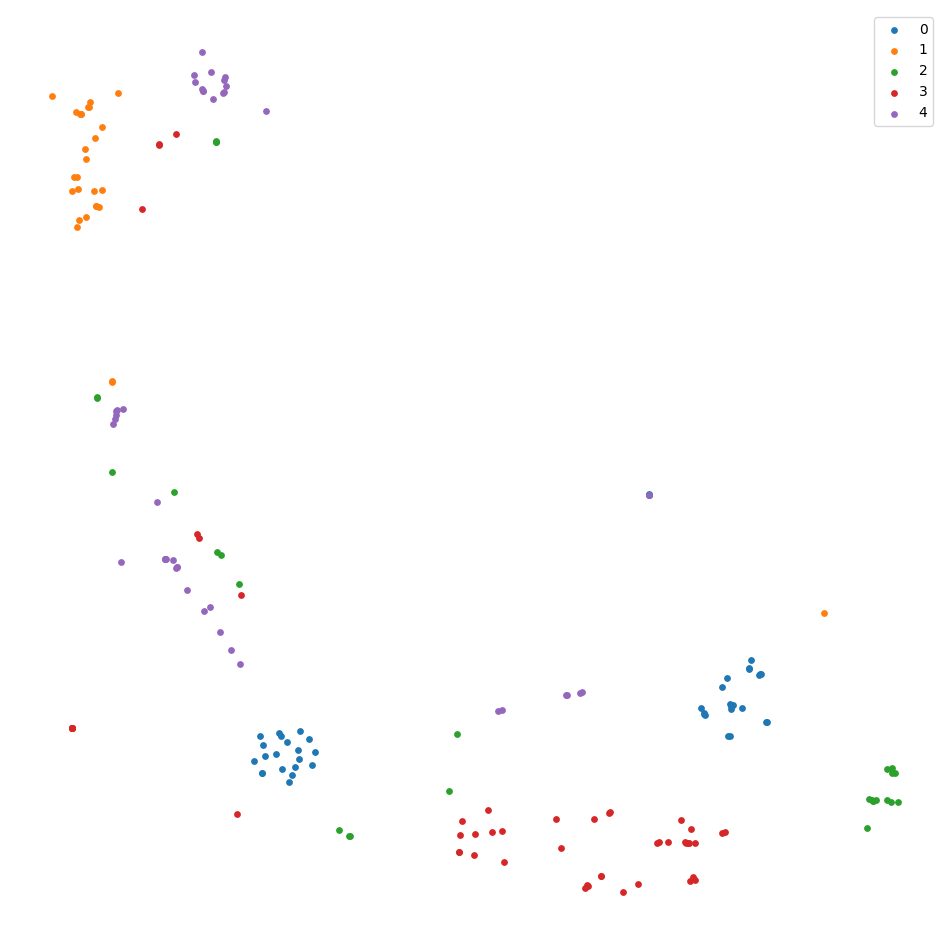

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.manifold import TSNE


color = Y
#color = [np.argmax(i) for i in color] # take one-hot Convert encoding to integer 
#color = np.stack(color, axis=0)
group = color
#cdict = {0:'black', 1: 'red', 2: 'blue', 3: 'green',}

n_neighbors = 12   # How many categories are there 

##### 2D feature plot
y = TSNE(n_components=2, learning_rate='auto',init='pca').fit_transform(X)
scatter_x = y[:, 0]
scatter_y = y[:, 1]

#cdict = {0:'black', 1: 'red', 2: 'blue', 3: 'green', 4:'brown', 5:'gray', 6:'yellow', 7:'orange', 8:'purple', 9:'cyan', 10:'pink', 11:'olive',}
fig = plt.figure(figsize=(12, 12))
for g in np.unique(group):
    ix = np.where(group == g)
    plt.scatter(scatter_x[ix], scatter_y[ix] ,label = g, s = 15)
plt.legend()
plt.axis('off')

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from scipy.stats import randint
import warnings



warnings.filterwarnings('ignore') 

kf = KFold(n_splits=5, random_state=42, shuffle=True)
max_acc = 0
all_accs = []
#MultinomialNB
#print("dataset_name: ",i[1])
print("Model_name: ","MultinomialNB")
for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]
  
  mnparams = {"alpha":[0.1,0.2,0.3,0.4]}
  #random_search = HalvingRandomSearchCV(MultinomialNB(), mnparams ,random_state=42)
  random_search = RandomizedSearchCV(estimator = MultinomialNB(), param_distributions= mnparams,
                                    n_iter =10, cv=9, n_jobs=1,scoring = 'f1_micro')
  random_search.fit(X_train, y_train)
  classifier = MultinomialNB(alpha = random_search.best_params_["alpha"])
  classifier.fit(X_train,y_train)
  acc = f1_score(y_test, classifier.predict(X_test) , average='macro')
  all_accs.append(acc)
  
  if acc>max_acc:
    max_acc = acc
    y_pred = classifier.predict(X_test)
    
    cls_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
print(cls_report)
print(conf_matrix)
print("\n")
print("-----------------------------------------------")

Model_name:  MultinomialNB
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.86      0.75      0.80         8
           2       0.80      0.80      0.80         5
           3       0.80      0.80      0.80        10
           4       0.67      0.60      0.63        10

    accuracy                           0.76        38
   macro avg       0.77      0.79      0.77        38
weighted avg       0.77      0.76      0.76        38

[[5 0 0 0 0]
 [0 6 1 0 1]
 [0 0 4 0 1]
 [1 0 0 8 1]
 [1 1 0 2 6]]


-----------------------------------------------


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings



kf = KFold(n_splits=5, random_state=42, shuffle=True)
max_acc = 0
all_accs = []
svcparams = {'C': [0.1,1,2],'kernel': ['rbf', 'poly', 'sigmoid']} #find best parameters 
#svcparams = {'C': [0.1,1,2], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']} #find best parameters 
random_search = RandomizedSearchCV(estimator = svm.SVC(), param_distributions= svcparams,
                                n_iter =10, cv=9, n_jobs=-1,scoring = 'accuracy')
random_search.fit(X, Y)
#SVM
#print("dataset_name: ",i[1])
print("Model_name: ","SVM")
for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]

  classifier = svm.SVC(kernel= random_search.best_params_["kernel"], 
                        C = random_search.best_params_["C"], 
                        random_state = 42)
  classifier.fit(X_train,y_train)
  acc = f1_score(y_test, classifier.predict(X_test) , average='macro')
  all_accs.append(acc)
  print(f"Fold {i}:")
  if acc>max_acc:
    max_acc = acc
    y_pred = classifier.predict(X_test)
    #target_names = y_pred[:-1].unique().tolist()
    cls_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
print(cls_report)
print(conf_matrix)
print(all_accs)
print("\n")
print("-----------------------------------------------")

Model_name:  SVM
Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

[[ 7  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0  9]]
[1.0, 0.9759197324414716, 0.9264367816091955, 0.9509003074220466, 0.9684848484848484]


-----------------------------------------------


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings

warnings.filterwarnings('ignore') 

kf = KFold(n_splits=5, random_state=42, shuffle=True)
max_acc = 0
all_accs = []
#print("dataset_name: ",i[1])
#DecisionTreeClassifier
print("Model_name: ","DecisionTreeClassifier")
for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]

  DSparams={
"max_depth" : [2,4,6,8,10,12,14],
"criterion" : ['gini','entropy'],
"min_samples_split" : range(2,10),
"min_samples_leaf" : range(2,10),
  }
  random_search = RandomizedSearchCV(estimator = DecisionTreeClassifier(), param_distributions=DSparams,
                                  n_iter =10, cv=9, n_jobs=1,scoring = 'f1_micro')
  random_search.fit(X_train, y_train)
  classifier = DecisionTreeClassifier(min_samples_split= random_search.best_params_["min_samples_split"]
                                      ,min_samples_leaf = random_search.best_params_["min_samples_leaf"],
                                      max_depth =  random_search.best_params_["max_depth"], 
                                      criterion = random_search.best_params_["criterion"])
  classifier.fit(X_train,y_train)
  acc = f1_score(y_test, classifier.predict(X_test) , average='macro')
  all_accs.append(acc)
  print(f"Fold {i}:")
  if acc>max_acc:
    max_acc = acc
    y_pred = classifier.predict(X_test)
    print(y_pred)
    #target_names = y_pred[:-1].unique().tolist()
    cls_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
print(cls_report)
print(conf_matrix)
print(all_accs)
print("\n")
print("-----------------------------------------------")

Model_name:  DecisionTreeClassifier
Fold 0:
[0 0 0 0 0 0 0 1 1 1 1 1 1 3 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 0 4 4
 4 4]
Fold 1:
[0 0 4 0 0 0 0 0 4 0 0 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4]
Fold 2:
Fold 3:
[0 0 0 0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 2 2 2 4 2 3 3 3 3 3 4 4 4 4 4 4 4 4 4
 4 4]
Fold 4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         5
           2       1.00      0.90      0.95        10
           3       1.00      1.00      1.00         5
           4       0.92      1.00      0.96        11

    accuracy                           0.97        39
   macro avg       0.98      0.98      0.98        39
weighted avg       0.98      0.97      0.97        39

[[ 8  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  9  0  1]
 [ 0  0  0  5  0]
 [ 0  0  0  0 11]]
[0.9446797385620915, 0.9550000000000001, 0.9264367816091955, 0.9807780320366133, 0.9112918660287083]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import warnings

warnings.filterwarnings('ignore')  

rfparams={
  'n_estimators': [200, 500],
  'max_features': ['auto', 'sqrt', 'log2'],
  'max_depth' : [4,5,6,7,8],
  'criterion' :['gini', 'entropy']
  }
rfc=RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator = rfc, param_distributions=rfparams,
                                  n_iter =10, cv=9, n_jobs=-1)
random_search.fit(X, Y)
kf = KFold(n_splits=5, random_state=42, shuffle=True)
max_acc = 0
all_accs = []
#print("dataset_name: ",i[1])
#RandomForestClassifier
max_acc = 0
for i, (train_index, test_index) in enumerate(kf.split(X)):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = Y[train_index], Y[test_index]

  
  classifier = RandomForestClassifier(random_state = 42,
                                      n_estimators= random_search.best_params_["n_estimators"],
                                      max_features= random_search.best_params_["max_features"],
                                      max_depth= random_search.best_params_["max_depth"],
                                      criterion= random_search.best_params_["criterion"])
  classifier.fit(X_train,y_train)
  acc = f1_score(y_test, classifier.predict(X_test) , average='macro')
  all_accs.append(acc)
  print(f"Fold {i}:")
  if acc>max_acc:
    max_acc = acc
    y_pred = classifier.predict(X_test)
    print(y_pred)
    #target_names = y_pred[:-1].unique().tolist()
    cls_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
print(cls_report)
print(conf_matrix)
print(all_accs)
print("\n")
print("-----------------------------------------------")

Fold 0:
[0 0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 4]
Fold 1:
Fold 2:
Fold 3:
Fold 4:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         9

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

[[ 7  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0  9]]
[1.0, 1.0, 0.9264367816091955, 0.9444444444444444, 0.9684848484848484]


-----------------------------------------------
